<h1> House Prices Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
house = pd.read_excel('04_House_Price.xlsx', sheet_name='House_Price', index_col = None, skiprows=2)

In [3]:
house.head()

Unnamed: 0  price  crime_rate  resid_area  air_qual  room_num   age  dist1  \
0         NaN   24.0    0.006300       32.31     0.538     6.575  65.2   4.35   
1         NaN   21.6    0.026944       37.07     0.469     6.421  78.9   4.99   
2         NaN   34.7    0.026924       37.07     0.469     7.185  61.1   5.03   
3         NaN   33.4    0.031857       32.18     0.458     6.998  45.8   6.21   
4         NaN   36.2    0.066770       32.18     0.458     7.147  54.2   6.16   

   dist2  dist3  dist4  teachers  poor_prop  n_hos_beds  n_hot_rooms  \
0   3.81   4.18   4.01      24.7       4.98       5.480      11.1920   
1   4.70   5.12   5.06      22.2       9.14       7.332      12.1728   
2   4.86   5.01   4.97      22.2       4.03       7.394     101.1200   
3   5.93   6.16   5.96      21.3       2.94       9.268      11.2672   
4   5.86   6.37   5.86      21.3       5.33       8.824      11.2896   

   rainfall     parks airport waterbody bus_ter  
0        23  0.049347     YES     River     YES  
1        42  0.046146      NO      Lake     YES  
2        38  0.045764      NO      None     YES  
3        45  0.047151     YES      Lake     YES  
4        55  0.039474      NO      Lake     YES

In [5]:
house.drop('Unnamed: 0', axis = 1, inplace = True)
house.head()

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0    0.006300       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6    0.026944       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7    0.026924       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4    0.031857       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2    0.066770       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  teachers  poor_prop  n_hos_beds  n_hot_rooms  rainfall  \
0   4.18   4.01      24.7       4.98       5.480      11.1920        23   
1   5.12   5.06      22.2       9.14       7.332      12.1728        42   
2   5.01   4.97      22.2       4.03       7.394     101.1200        38   
3   6.16   5.96      21.3       2.94       9.268      11.2672        45   
4   6.37   5.86      21.3       5.33       8.824      11.2896        55   

      parks airport waterbody bus_ter  
0  0.049347     YES     River     YES  
1  0.046146      NO      Lake     YES  
2  0.045764      NO      None     YES  
3  0.047151     YES      Lake     YES  
4  0.039474      NO      Lake     YES

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  rainfall     506 non-null    int64  
 15  parks        506 non-null    float64
 16  airport      506 non-null    object 
 17  waterbody    506 non-null    object 
 18  bus_ter      506 non-null    object 
dtypes: float

In [7]:
house.describe()

price  crime_rate  resid_area    air_qual    room_num         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    0.813418   41.136779    0.554695    6.284634   68.574901   
std      9.182176    1.022731    6.860353    0.115878    0.702617   28.148861   
min      5.000000    0.006300   30.460000    0.385000    3.561000    2.900000   
25%     17.025000    0.078853   35.190000    0.449000    5.885500   45.025000   
50%     21.200000    0.228336   39.690000    0.538000    6.208500   77.500000   
75%     25.000000    1.542674   48.100000    0.624000    6.623500   94.075000   
max     50.000000    4.499545   57.740000    0.871000    8.780000  100.000000   

            dist1       dist2       dist3       dist4    teachers   poor_prop  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.971996    3.628775    3.960672    3.618972   21.544466   12.653063   
std      2.108532    2.108580    2.119797    2.099203    2.164946    7.141062   
min      1.130000    0.920000    1.150000    0.730000   18.000000    1.730000   
25%      2.270000    1.940000    2.232500    1.940000   19.800000    6.950000   
50%      3.385000    3.010000    3.375000    3.070000   20.950000   11.360000   
75%      5.367500    4.992500    5.407500    4.985000   22.600000   16.955000   
max     12.320000   11.930000   12.320000   11.940000   27.400000   37.970000   

       n_hos_beds  n_hot_rooms    rainfall       parks  
count  498.000000   506.000000  506.000000  506.000000  
mean     7.899767    13.041605   39.187747    0.054454  
std      1.476683     5.238957   12.497221    0.010632  
min      5.268000    10.057600    6.000000    0.033292  
25%      6.634500    11.189800   28.000000    0.046464  
50%      7.999000    12.720000   39.000000    0.053507  
75%      9.088000    14.170800   50.000000    0.061397  
max     10.876000   101.120000   60.000000    0.086711

<AxesSubplot:>

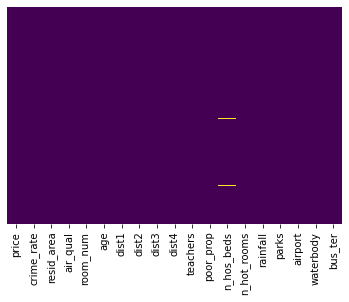

In [10]:
# Visualizing the null values
sns.heatmap(house.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

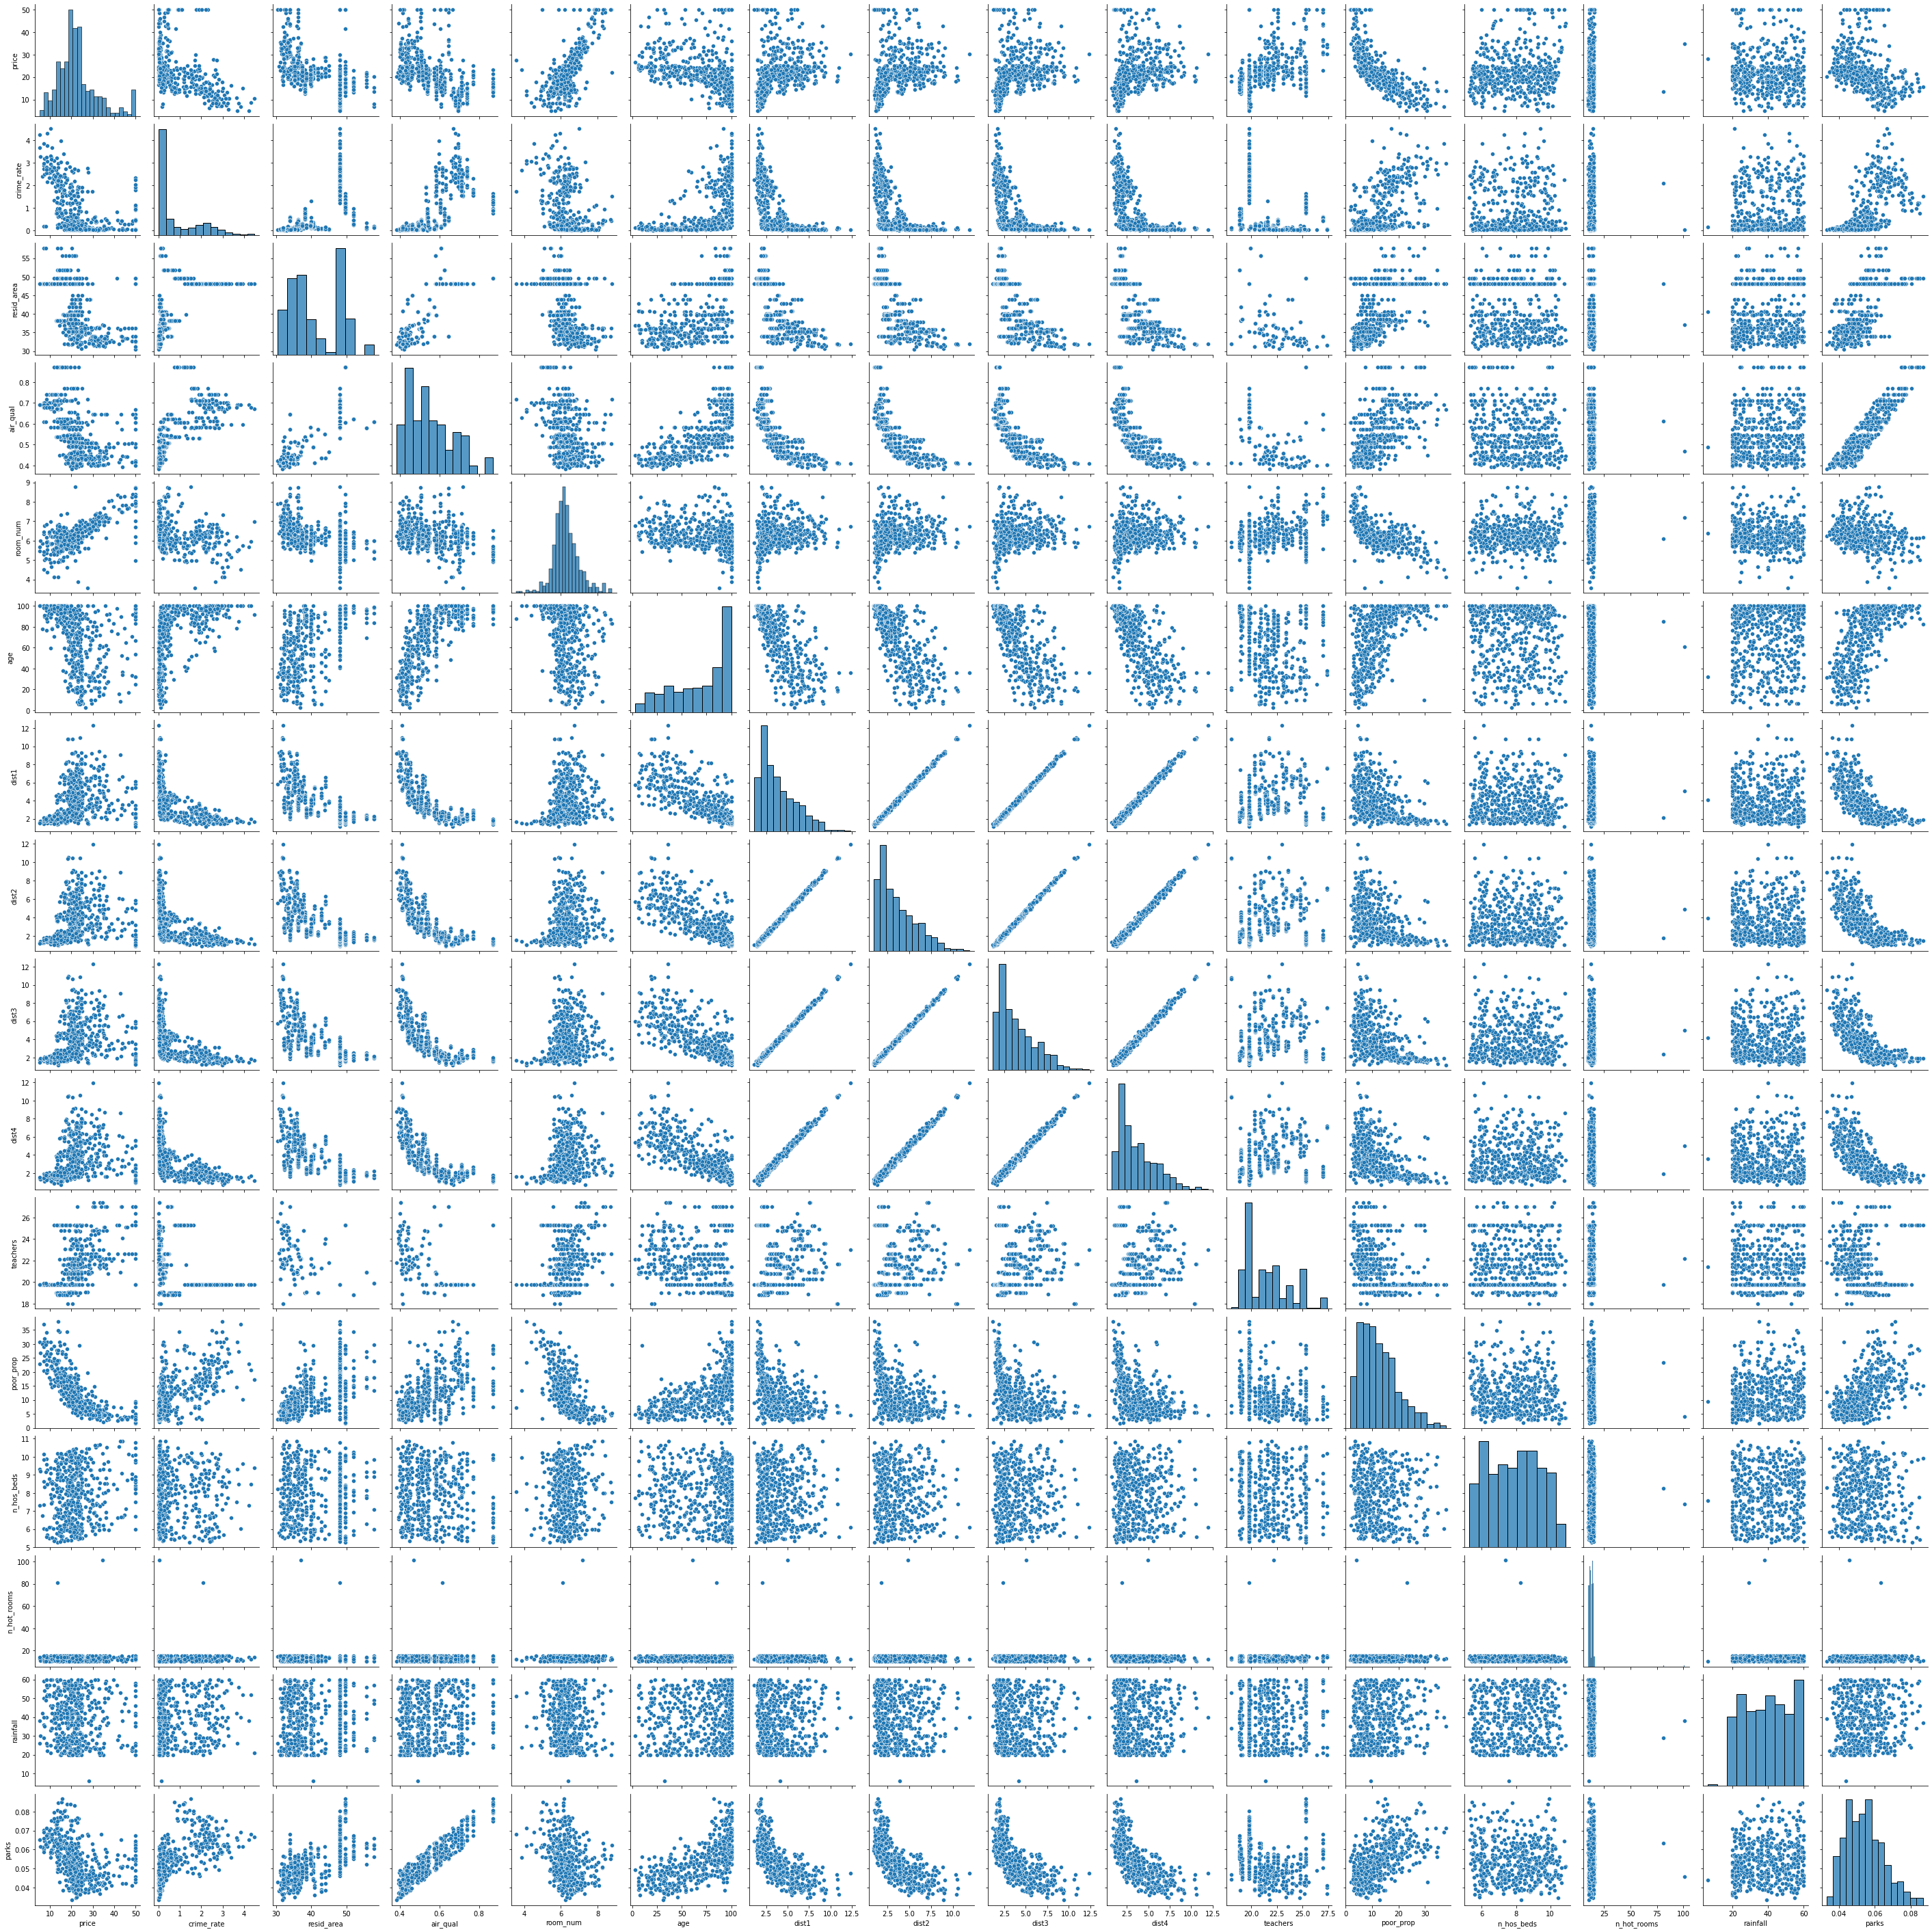

In [11]:
sns.pairplot(house)

In [12]:
house.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop',
       'n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks', 'airport',
       'waterbody', 'bus_ter'],
      dtype='object')

<AxesSubplot:>

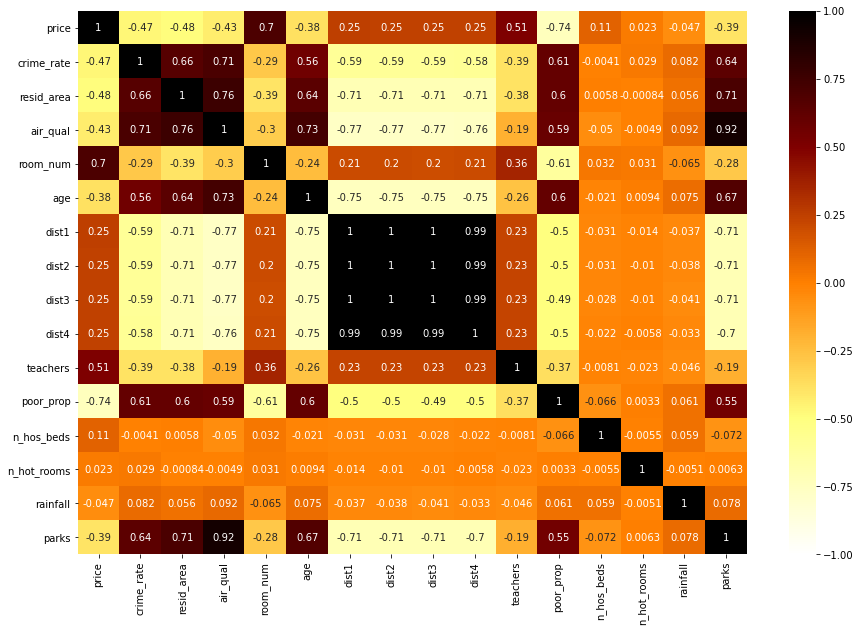

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(house.corr(), vmax = 1, vmin = -1, annot = True, cmap = 'afmhot_r')

In [29]:
# Selecting relevant features

def correl (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
threshold_values = [0.5,0.6,0.7,0.8]
for value in threshold_values:
    corr_features = correl(house,value)
    print(corr_features)
    print(len(set(corr_features)))

{'air_qual', 'dist4', 'poor_prop', 'dist3', 'parks', 'dist2', 'teachers', 'room_num', 'age', 'resid_area'}
10
{'air_qual', 'dist4', 'poor_prop', 'dist3', 'parks', 'dist2', 'room_num', 'age', 'resid_area'}
9
{'air_qual', 'dist4', 'dist3', 'dist2', 'age', 'parks'}
6
{'parks', 'dist4', 'dist2', 'dist3'}
4


In [32]:
# Using a threshold of 0.8, we take parks, dist4, dist2, and dist3 not to be relavant to our analysis

house.drop(columns=['parks','dist4','dist3','dist2'], axis = 1, inplace = True)

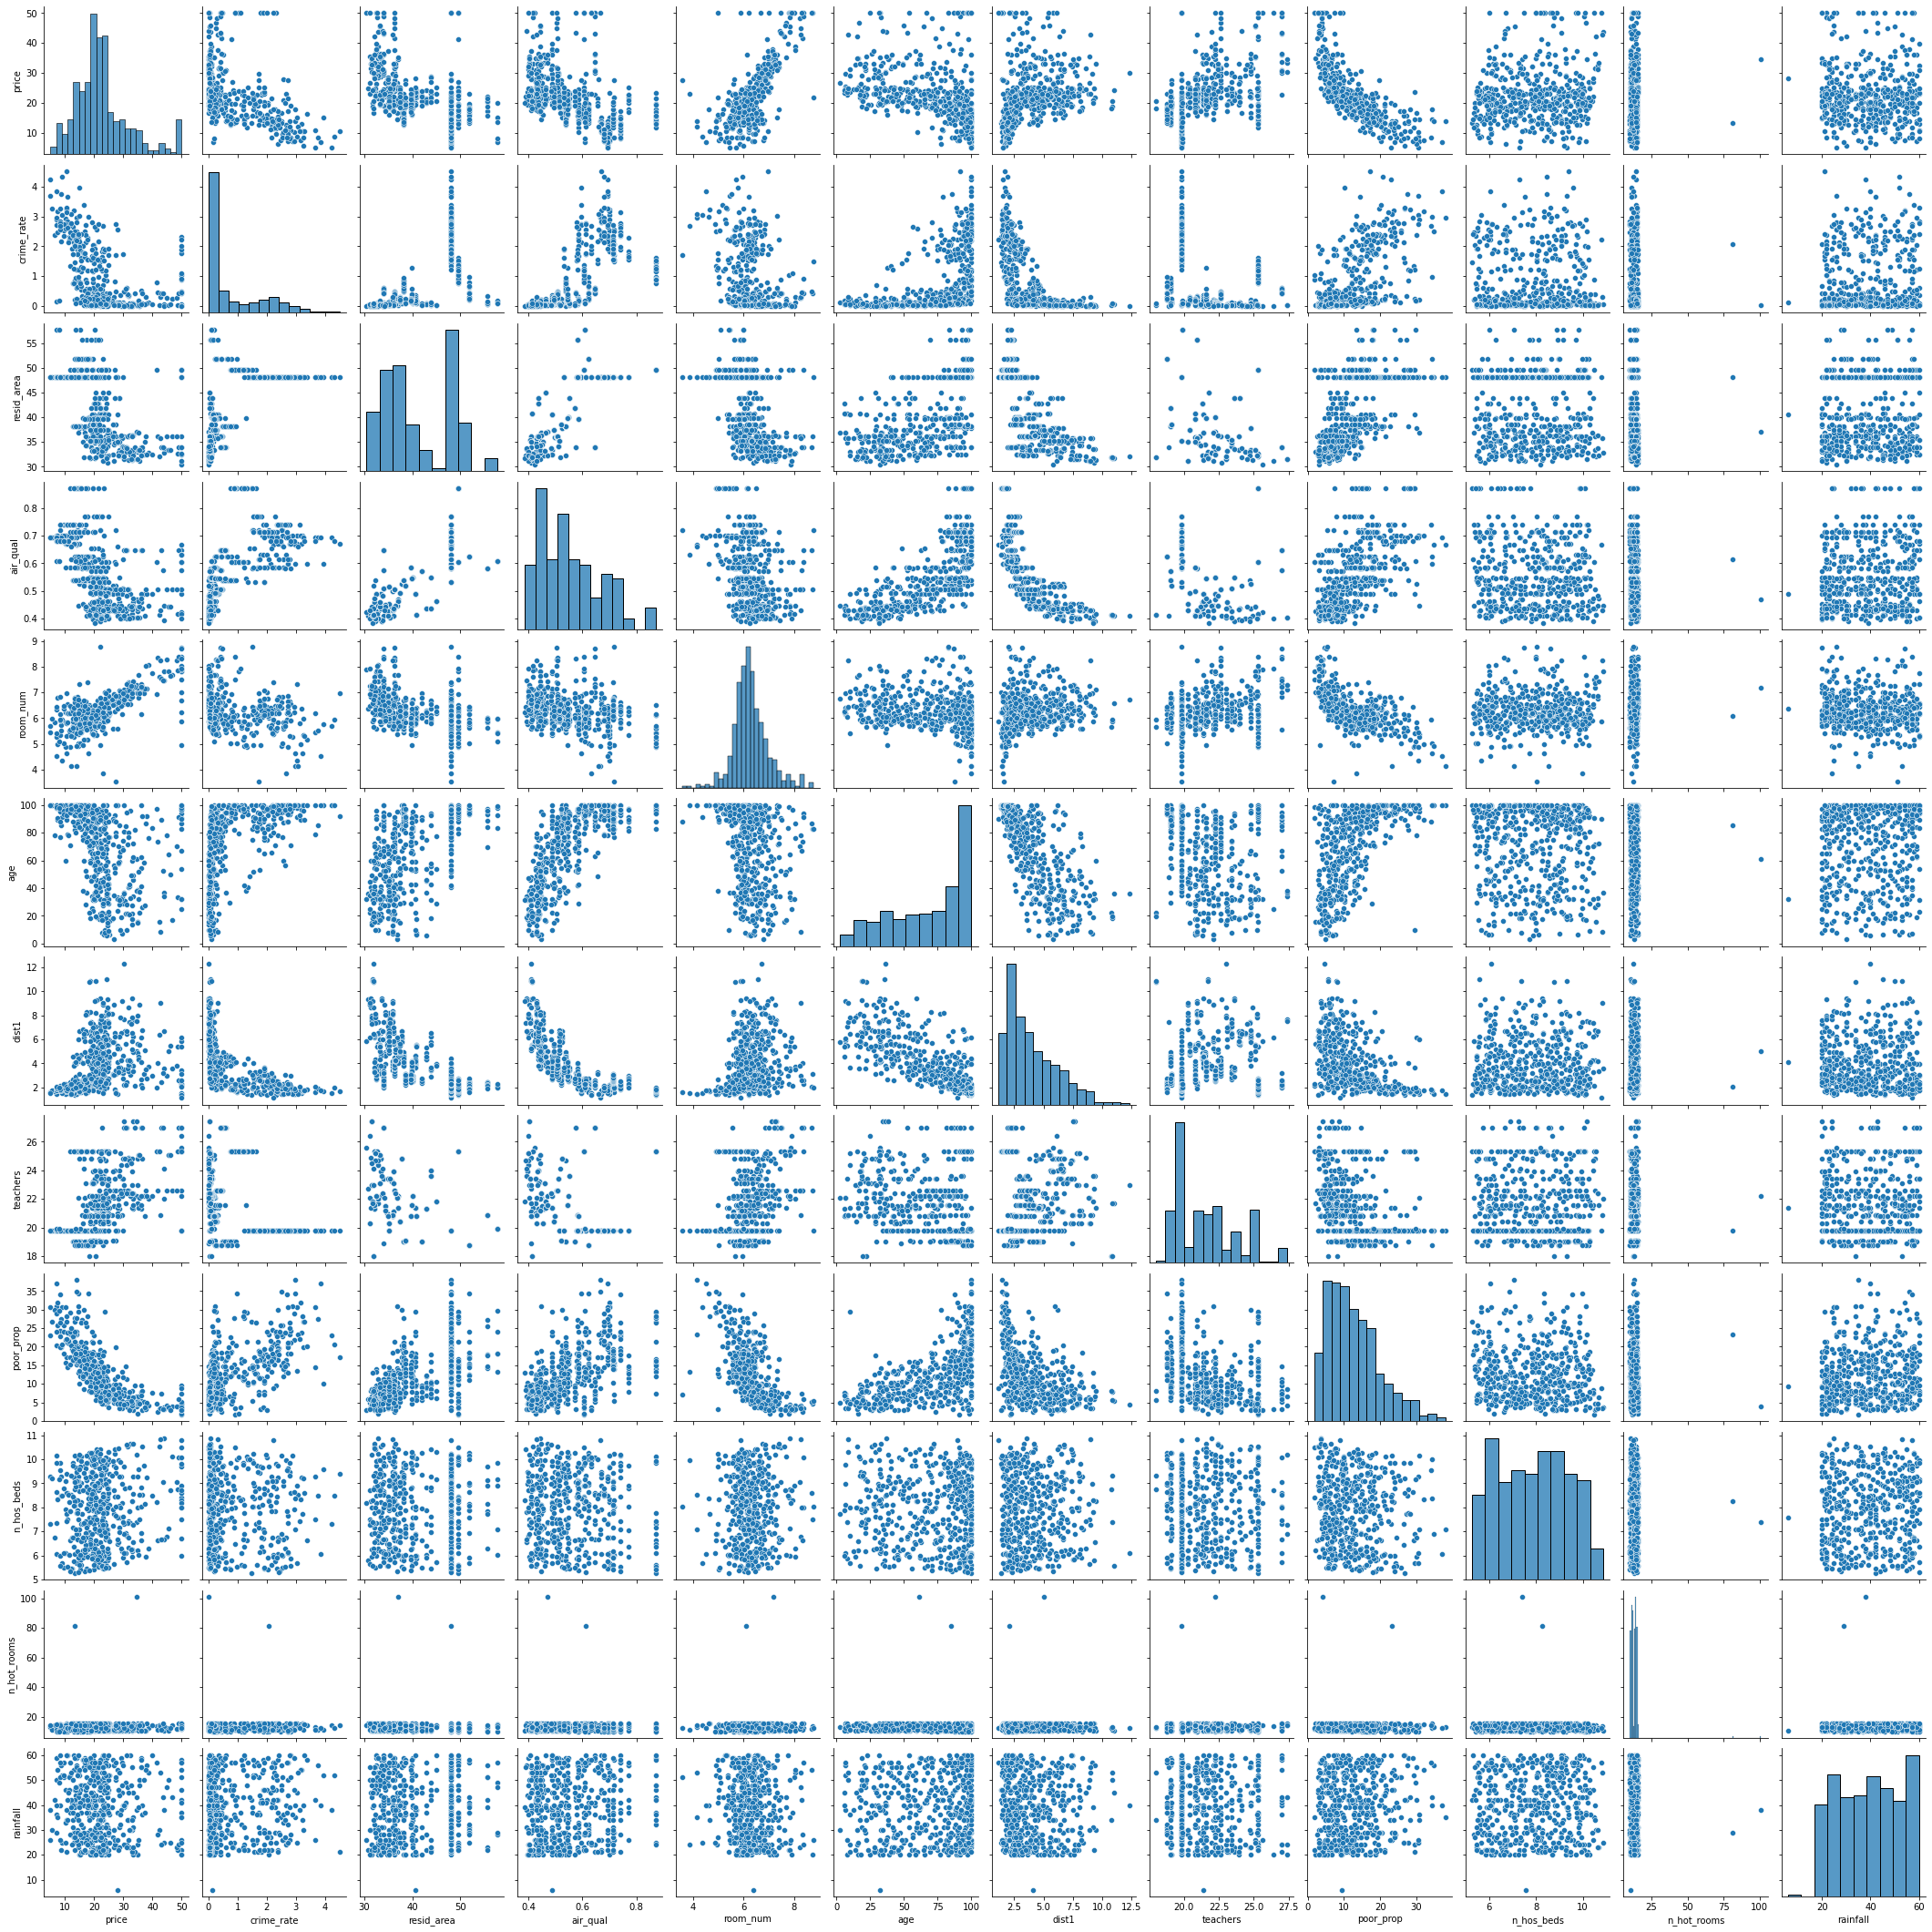

In [33]:
sns.pairplot(house)

<h4> Missing values and outliers

In [34]:
# n_hos_beds has some missing values
house['n_hos_beds'].isnull().sum()

8

In [35]:
# filling the null values with the mean

house['n_hos_beds'].fillna(value=house['n_hos_beds'].mean(), inplace=True)
house['n_hos_beds'].isnull().sum()

0

In [36]:
# Outliers

<AxesSubplot:>

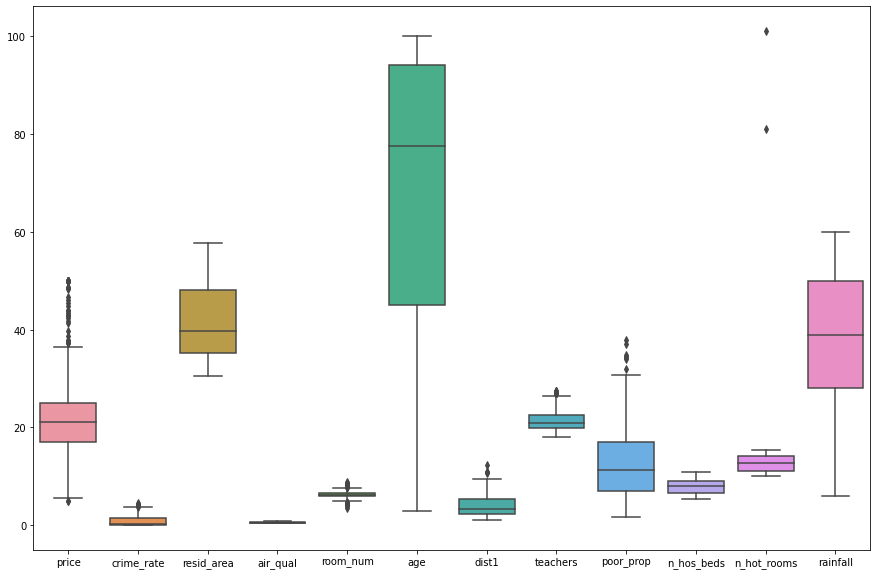

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(data=house)

In [56]:
def get_quantile(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    data = [Q1,Q3,IQR,Lower_Whisker,Upper_Whisker]
    values = pd.DataFrame(data,index=['Q1','Q3','IQR','Lower_Whisker','Upper_Whisker'],columns=[col.name])
    return values

In [57]:
# n_hot_rooms seem to have very large outliers
get_quantile(house['n_hot_rooms'])

n_hot_rooms
Q1                 11.1898
Q3                 14.1708
IQR                 2.9810
Lower_Whisker       6.7183
Upper_Whisker      18.6423

In [66]:
Upper_Whisker = get_quantile(house['n_hot_rooms']).iloc[4,0]
Upper_Whisker

18.642300000000002

In [67]:
# filling the outliers with the Upper Whisker Value
house['n_hot_rooms'].mask(house['n_hot_rooms'] > Upper_Whisker, Upper_Whisker,inplace=True)

In [68]:
house.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'teachers', 'poor_prop', 'n_hos_beds', 'n_hot_rooms',
       'rainfall', 'airport', 'waterbody', 'bus_ter'],
      dtype='object')

In [70]:
# Creating dummy variables for the non-numerical columns
house2 = pd.get_dummies(data=house,columns = ['waterbody','airport','bus_ter'])
house2

price  crime_rate  resid_area  air_qual  room_num   age  dist1  teachers  \
0     24.0    0.006300       32.31     0.538     6.575  65.2   4.35      24.7   
1     21.6    0.026944       37.07     0.469     6.421  78.9   4.99      22.2   
2     34.7    0.026924       37.07     0.469     7.185  61.1   5.03      22.2   
3     33.4    0.031857       32.18     0.458     6.998  45.8   6.21      21.3   
4     36.2    0.066770       32.18     0.458     7.147  54.2   6.16      21.3   
..     ...         ...         ...       ...       ...   ...    ...       ...   
501   22.4    0.060747       41.93     0.573     6.593  69.1   2.64      19.0   
502   20.6    0.044275       41.93     0.573     6.120  76.7   2.44      19.0   
503   23.9    0.058986       41.93     0.573     6.976  91.0   2.34      19.0   
504   22.0    0.103991       41.93     0.573     6.794  89.3   2.54      19.0   
505   19.0    0.046320       41.93     0.573     6.030  80.8   2.72      19.0   

     poor_prop  n_hos_beds  n_hot_rooms  rainfall  waterbody_Lake  \
0         4.98       5.480      11.1920        23               0   
1         9.14       7.332      12.1728        42               1   
2         4.03       7.394      18.6423        38               0   
3         2.94       9.268      11.2672        45               1   
4         5.33       8.824      11.2896        55               1   
..         ...         ...          ...       ...             ...   
501       9.67       9.348      12.1792        27               0   
502       9.08       6.612      13.1648        20               0   
503       5.64       5.478      12.1912        31               0   
504       6.48       7.940      15.1760        47               0   
505       7.88      10.280      10.1520        45               0   

     waterbody_Lake and River  waterbody_None  waterbody_River  airport_NO  \
0                           0               0                1           0   
1                           0               0                0           1   
2                           0               1                0           1   
3                           0               0                0           0   
4                           0               0                0           1   
..                        ...             ...              ...         ...   
501                         1               0                0           1   
502                         1               0                0           0   
503                         0               1                0           1   
504                         0               1                0           0   
505                         0               1                0           0   

     airport_YES  bus_ter_YES  
0              1            1  
1              0            1  
2              0            1  
3              1            1  
4              0            1  
..           ...          ...  
501            0            1  
502            1            1  
503            0            1  
504            1            1  
505            1            1  

[506 rows x 19 columns]

In [72]:
house2.drop(columns=['waterbody_None','airport_NO','bus_ter_YES'],axis=1, inplace = True)
house2

price  crime_rate  resid_area  air_qual  room_num   age  dist1  teachers  \
0     24.0    0.006300       32.31     0.538     6.575  65.2   4.35      24.7   
1     21.6    0.026944       37.07     0.469     6.421  78.9   4.99      22.2   
2     34.7    0.026924       37.07     0.469     7.185  61.1   5.03      22.2   
3     33.4    0.031857       32.18     0.458     6.998  45.8   6.21      21.3   
4     36.2    0.066770       32.18     0.458     7.147  54.2   6.16      21.3   
..     ...         ...         ...       ...       ...   ...    ...       ...   
501   22.4    0.060747       41.93     0.573     6.593  69.1   2.64      19.0   
502   20.6    0.044275       41.93     0.573     6.120  76.7   2.44      19.0   
503   23.9    0.058986       41.93     0.573     6.976  91.0   2.34      19.0   
504   22.0    0.103991       41.93     0.573     6.794  89.3   2.54      19.0   
505   19.0    0.046320       41.93     0.573     6.030  80.8   2.72      19.0   

     poor_prop  n_hos_beds  n_hot_rooms  rainfall  waterbody_Lake  \
0         4.98       5.480      11.1920        23               0   
1         9.14       7.332      12.1728        42               1   
2         4.03       7.394      18.6423        38               0   
3         2.94       9.268      11.2672        45               1   
4         5.33       8.824      11.2896        55               1   
..         ...         ...          ...       ...             ...   
501       9.67       9.348      12.1792        27               0   
502       9.08       6.612      13.1648        20               0   
503       5.64       5.478      12.1912        31               0   
504       6.48       7.940      15.1760        47               0   
505       7.88      10.280      10.1520        45               0   

     waterbody_Lake and River  waterbody_River  airport_YES  
0                           0                1            1  
1                           0                0            0  
2                           0                0            0  
3                           0                0            1  
4                           0                0            0  
..                        ...              ...          ...  
501                         1                0            0  
502                         1                0            1  
503                         0                0            0  
504                         0                0            1  
505                         0                0            1  

[506 rows x 16 columns]

In [78]:
house2.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'teachers', 'poor_prop', 'n_hos_beds', 'n_hot_rooms',
       'rainfall', 'waterbody_Lake', 'waterbody_Lake and River',
       'waterbody_River', 'airport_YES'],
      dtype='object')

In [80]:
X1 = house2.drop(['price','waterbody_Lake', 'waterbody_Lake and River','waterbody_River', 'airport_YES'], axis = 1)
X2 = house2[['waterbody_Lake', 'waterbody_Lake and River','waterbody_River', 'airport_YES']]
y = house2['price']
print('X1:', X1.shape)
print('X2:', X2.shape)
print('y:', y.shape)

X1: (506, 11)
X2: (506, 4)
y: (506,)


In [75]:
# transform the variables

In [100]:
X1_log = np.log(X1)
y = np.log(y)

In [91]:
X = pd.concat([X1,X2], axis = 1)
X

crime_rate  resid_area  air_qual  room_num   age  dist1  teachers  \
0      0.006300       32.31     0.538     6.575  65.2   4.35      24.7   
1      0.026944       37.07     0.469     6.421  78.9   4.99      22.2   
2      0.026924       37.07     0.469     7.185  61.1   5.03      22.2   
3      0.031857       32.18     0.458     6.998  45.8   6.21      21.3   
4      0.066770       32.18     0.458     7.147  54.2   6.16      21.3   
..          ...         ...       ...       ...   ...    ...       ...   
501    0.060747       41.93     0.573     6.593  69.1   2.64      19.0   
502    0.044275       41.93     0.573     6.120  76.7   2.44      19.0   
503    0.058986       41.93     0.573     6.976  91.0   2.34      19.0   
504    0.103991       41.93     0.573     6.794  89.3   2.54      19.0   
505    0.046320       41.93     0.573     6.030  80.8   2.72      19.0   

     poor_prop  n_hos_beds  n_hot_rooms  rainfall  waterbody_Lake  \
0         4.98       5.480      11.1920        23               0   
1         9.14       7.332      12.1728        42               1   
2         4.03       7.394      18.6423        38               0   
3         2.94       9.268      11.2672        45               1   
4         5.33       8.824      11.2896        55               1   
..         ...         ...          ...       ...             ...   
501       9.67       9.348      12.1792        27               0   
502       9.08       6.612      13.1648        20               0   
503       5.64       5.478      12.1912        31               0   
504       6.48       7.940      15.1760        47               0   
505       7.88      10.280      10.1520        45               0   

     waterbody_Lake and River  waterbody_River  airport_YES  
0                           0                1            1  
1                           0                0            0  
2                           0                0            0  
3                           0                0            1  
4                           0                0            0  
..                        ...              ...          ...  
501                         1                0            0  
502                         1                0            1  
503                         0                0            0  
504                         0                0            1  
505                         0                0            1  

[506 rows x 15 columns]

In [92]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lm = LinearRegression()

In [102]:
lm.fit(X_train,y_train)

LinearRegression()

In [103]:
predictions = lm.predict(X_test)

<AxesSubplot:xlabel='price'>

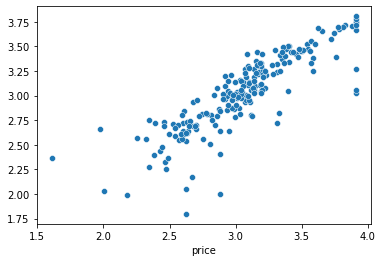

In [104]:
sns.scatterplot(x=y_test,y=predictions)

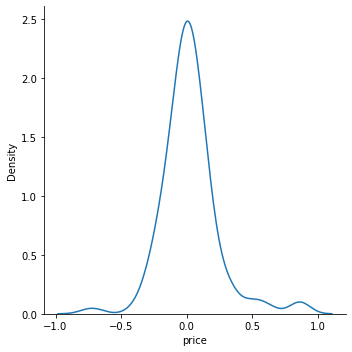

In [105]:
# plotting the distribution of the residuals
sns.displot((y_test-predictions),kind='kde')

In [106]:
pd.DataFrame(lm.coef_,index=X.columns,columns=['Coeff'])

Coeff
crime_rate               -0.062208
resid_area               -0.000362
air_qual                 -0.616233
room_num                  0.129931
age                       0.000220
dist1                    -0.042059
teachers                  0.034000
poor_prop                -0.031116
n_hos_beds                0.002691
n_hot_rooms              -0.002261
rainfall                 -0.000258
waterbody_Lake            0.000394
waterbody_Lake and River -0.016311
waterbody_River          -0.034696
airport_YES               0.035538

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [108]:
print ('MAE:', mean_absolute_error(y_test,predictions))
print ('MSE:', mean_squared_error(y_test,predictions))
print ('RMSE:', np.sqrt(mean_squared_error(y_test,predictions)))
print ('R-squared:', explained_variance_score(y_test,predictions))

MAE: 0.14375193638312236
MSE: 0.04774333694775477
RMSE: 0.21850248728047644
R-squared: 0.7269324019695296


- <h4> Our model explains 72.6% of the change in the price of a house
- <h4> Adopting the MSE of 0.05 shows the model performed well with less errors